<div class="title_project">Аналитика в авиакомпании "F9"</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Импорт-библиотек-Python" data-toc-modified-id="Импорт-библиотек-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек Python</a></span></li><li><span><a href="#Оформление-и-стили" data-toc-modified-id="Оформление-и-стили-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оформление и стили</a></span></li><li><span><a href="#Импорт-файлов-и-изучение-данных" data-toc-modified-id="Импорт-файлов-и-изучение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Импорт файлов и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-рейсов,-совершенных-на-самолетах-разных-моделей" data-toc-modified-id="Анализ-рейсов,-совершенных-на-самолетах-разных-моделей-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ рейсов, совершенных на самолетах разных моделей</a></span></li><li><span><a href="#Анализ-городов-с-аэропортами,-принимающими-наибольшим-количество-рейсов" data-toc-modified-id="Анализ-городов-с-аэропортами,-принимающими-наибольшим-количество-рейсов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ городов с аэропортами, принимающими наибольшим количество рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Введение

**Цель:** изучить базу данных и проанализировать модельный ряд самолетов, на которых осуществляются внутренние рейсы, а также спрос пассажиров на рейсы в разные города.

---

 **Данные:**

***Файл № 1:*** **query_1** 

В нём содержится информация о:  
   * `model`- модели самолета
   * `flights_amount` - количество рейсов для каждой модели самолетов model в сентябре 2018 года
   
***Файл № 2:*** **query_3** 

В нём содержится информация о:
   * `city` - городах
   * `average_flights` - среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

---
**План исследования:**  
 1. Импортировать файлы.  
 2. Изучить данные в них.
 3. Проверить типы данных на корректность.
 4. Выбрать Топ-10 городов по количеству рейсов.
 5. Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.
 6. Сделать выводы по каждому из графиков, пояснить результат.  

## Импорт библиотек Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from urllib.request import urlopen
import geopy
from geopy.geocoders import Yandex
import folium
from folium.plugins import BeautifyIcon
import branca.colormap as cm
import math

## Оформление и стили

In [2]:
# Подключение css
from IPython.core.display import HTML
styles = open('style.css', 'r', encoding='utf-8').read()
display(HTML('<style>%s</style>' % styles))

In [3]:
# Повышение качества отрисовки графиков
%config InlineBackend.figure_format = 'retina'

In [4]:
# Cловарь для переименования столцов
data_col = {'model': 'Модель', 'flights_amount': 'Кол-во рейсов', 'city': 'Город',
            'average_flights': 'Ср. кол-во рейсов', 'coords': 'Координаты', 'latitude': 'Широта',
            'longitude': 'Долгота'}

In [5]:
# Добавление стилей к графикам
sns.set_style('darkgrid', {'patch.edgecolor': 'black', 'axes.edgecolor': 'black'})

## Импорт файлов и изучение данных

In [6]:
data_1 = pd.read_csv('query_1.csv')
data_2 = pd.read_csv('query_3.csv')

###### Изучение данных из таблицы data_1

Изучим данные из первой таблицы:

In [7]:
data_1.rename(columns=data_col)

,Модель,Кол-во рейсов
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Таблица **data_1** содержит сведения о восьми моделях самолетов и количестве рейсов для каждой модели в сентябре 2018 года. Типы данных корректны.

###### Изучение данных из таблицы data_2

Изучим данные из второй таблицы:

In [9]:
data_2.head().rename(columns=data_col)

,Город,Ср. кол-во рейсов
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Таблица **data_2** содержит сведения о 101 городе и среднем количестве рейсов, прибывших в город за день в августе 2018 года. Учитывая метод расчета среднего числа, тип данных можно не менять и оставить в виде числа с плавающей запятой.

### Вывод

Данные из импортированных таблиц были изучены. Типы данных корректны. Преобразований не требуют.

## Анализ данных

### Анализ рейсов, совершенных на самолетах разных моделей

Построим график, отражающий количество рейсов, совершенных на разных моделях самолетов в сентябре 2018 года:

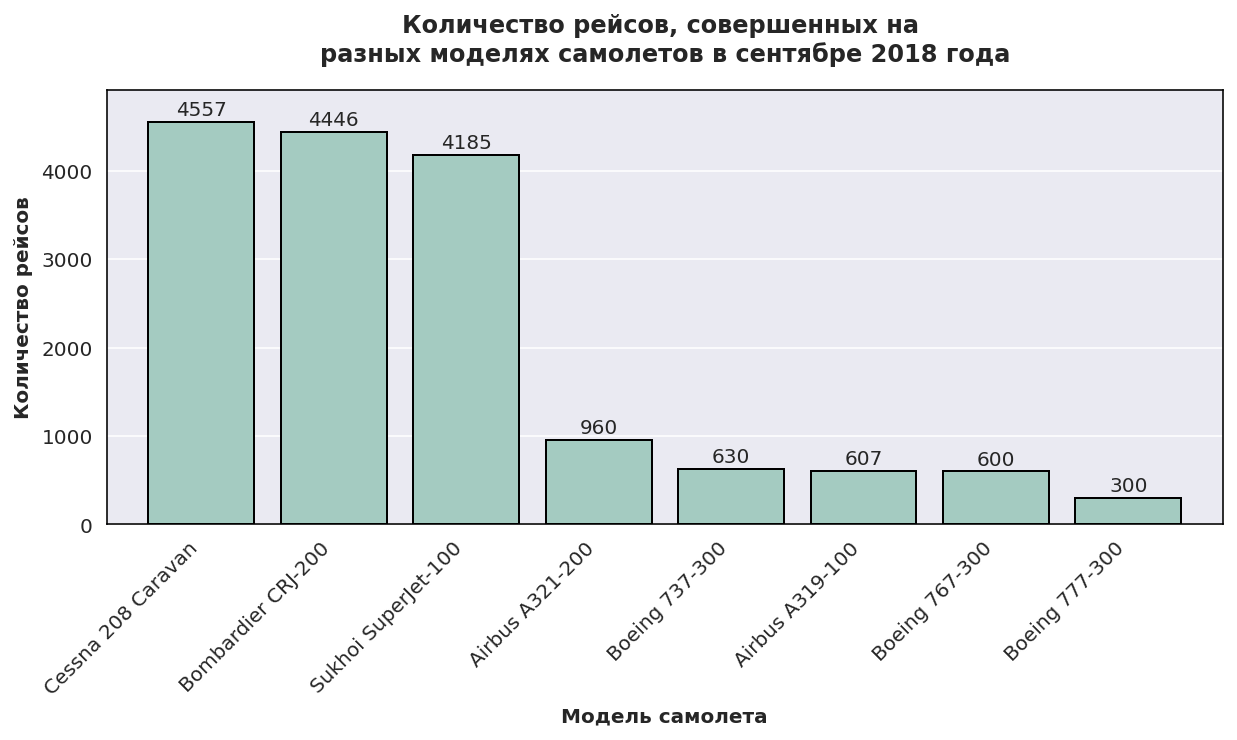

In [11]:
plt.figure(figsize=(10, 4))
ax_1 = sns.barplot(y='flights_amount', x='model', 
                   data=data_1.sort_values(by='flights_amount', ascending=False), color='#9DD2C4')
ax_1.set_title('Количество рейсов, совершенных на \nразных моделях самолетов в сентябре 2018 года', 
               fontweight='bold', pad=14)
ax_1.set_ylabel('Количество рейсов', fontweight='bold')
ax_1.set_xlabel('Модель самолета', fontweight='bold')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax_1.margins(0.04, 0.08)
for p in ax_1.patches:
    ax_1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

Проанализировав график "Количество рейсов, совершенных на разных моделях самолетов в сентябре 2018 года" можно выделить тройку наиболее востребованных самолетов - Cessna 208 Caravan (4557 рейсов), Bombardier CRJ-200 (4446 рейсов) и Sukhoi Superjet-100 (4185 рейсов).  

Cessna 208 Caravan является многофункциональным одномоторным самолётом и имеет репутацию одного из самых надежных и экономичных в мире; рассчитан на перевозку 9 пассажиров (или 1500 кг груза) на расстояние до 2000 км. Для эксплуатации самолёта в различных специальных условиях предусмотрена установка шасси на поплавках (амфибия), на лыжах или колеса с увеличенным размером шин низкого давления.

Bombardier CRJ-200 - это узкофюзеляжный региональный пассажирский самолет. Он предназначен для выполнения полетов по региональным маршрутам малой протяженности. В зависимости от выбранной компоновки самолета, пассажирский салон может вмещать от 40-а до 52-х пассажиров. 

Sukhoi Superjet 100 - российский ближнемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км. 

Каждый из самолетов занимает определенную нишу. Cessna 208 Caravan востребован на линиях с малым пассажиропотоком и сложными или специальными условиями эксплуатации. Bombardier CRJ-200 - на линиях со средним пассажиропотоком и зарекомендовал себя как экономически-выгодный. Sukhoi Superjet 100 востребован только на линиях с большим пассажиропотоком, иначе его эксплуатация становится убыточной с точки зрения экономики. На самолеты Airobus и Boeing было осуществлено меньшее количество вылетов, что вероятно связано востребованностью направлений вылетов, а также ключевой характеристикой пассажирского самолета - вместимостью. Анализируемые модели Airobus и Boeing способны перевозить от 144 пассажиров, что делает их использование выгодным только на направлениях с высоким пассажиропотоком.

### Анализ городов с аэропортами, принимающими наибольшим количество рейсов  

Отметим на карте города с аэропортом прибытия и укажем среднее количество рейсов, для чего предварительно определим координаты каждого города:

In [12]:
# Открыть файл или построить таблицу с координатами городов
try:
    data_2_coords = pd.read_csv('data_2_cor.csv')
except:
    geolocator = Yandex(api_key='***')
    def get_coords(city, geolocator=geolocator):
        ret = geolocator.geocode(city, timeout=60, lang='ru_RU')
        if ret is None:
            return None
        return ret.latitude, ret.longitude
    data_2_coords = data_2
    data_2_coords['coords'] = data_2_coords['city'].map(get_coords)
    data_2_coords[['latitude', 'longitude']] = pd.DataFrame(data_2_coords['coords'].tolist(),
                                               columns=['latitude', 'longitude'], index=data_2_coords.index)

In [13]:
data_2_coords['average_flights']=data_2_coords['average_flights'].round(1)
data_2_coords.head().rename(columns=data_col)

,Город,Ср. кол-во рейсов,Координаты,Широта,Долгота
0,Абакан,3.9,"(53.721152, 91.442396)",53.721152,91.442396
1,Анадырь,1.0,"(64.735814, 177.518913)",64.735814,177.518913
2,Анапа,2.2,"(44.894939, 37.316152)",44.894939,37.316152
3,Архангельск,5.4,"(64.539911, 40.515762)",64.539911,40.515762
4,Астрахань,2.5,"(46.347614, 48.030178)",46.347614,48.030178


In [14]:
fig_mapi = folium.Figure(width=900, height=350)
mapi = folium.Map(location=[60, 100], zoom_start=2.5, zoom_control=True, 
                  scrollWheelZoom=True, dragging=True).add_to(fig_mapi)
colormap = cm.LinearColormap(colors=['#4682B4', 'red'], index=[1,100],vmin=1,vmax=100)
for index, row in data_2_coords.iterrows():    
    folium.CircleMarker(location=[row['latitude'], row['longitude']], 
                        radius=3*math.sqrt(row['average_flights']), fill=True, opacity=0.8, 
                        color=colormap(row['average_flights'])).add_to(mapi)
    folium.Marker(location=[row['latitude'], row['longitude']], tooltip=row['city'],
                  icon=BeautifyIcon(icon_shape = 'marker', border_color='transparent',
                       background_color = '#4682B4', 
                       inner_icon_style = 'color:#FFD700; font-size:10px; font-weight:bold;', 
                       number=row['average_flights'])).add_to(mapi)    
mapi           

Авиакомпании в России (из выборки) осуществляют рейсы по 101 направлению, что хорошо видно на карте. Выделяются города с большим количество ежедневных рейсов. Определим Топ-10 таких городов:

In [15]:
data_top = data_2.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop = True)
data_top.rename(columns=data_col).round(1)

,Город,Ср. кол-во рейсов
0,Москва,129.8
1,Санкт-Петербург,31.2
2,Новосибирск,17.3
3,Красноярск,11.6
4,Екатеринбург,11.3
5,Ростов-на-Дону,10.2
6,Пермь,10.1
7,Брянск,10.0
8,Сочи,9.6
9,Ульяновск,9.6


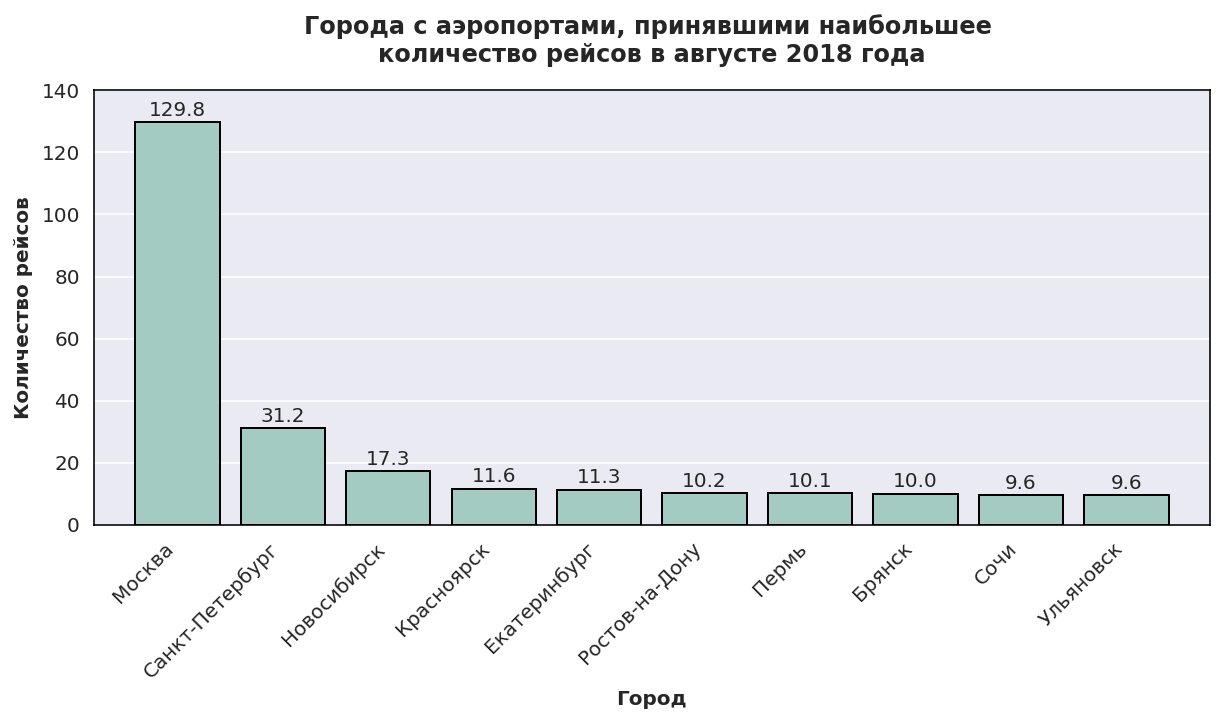

In [16]:
plt.figure(figsize=(10, 4))
ax_2 = sns.barplot(y='average_flights', x='city', data=data_top, color='#9DD2C4')
ax_2.set_title('Города с аэропортами, принявшими наибольшее \nколичество рейсов в августе 2018 года', 
               fontweight='bold', pad=14)
ax_2.set_ylabel('Количество рейсов', fontweight='bold')
ax_2.set_xlabel('Город', fontweight='bold')
ax_2.set_xticklabels(ax_2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax_2.margins(0.04, 0.08)
for p in ax_2.patches:
    ax_2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

В августе 2018 наибольшее число рейсов в день принимали аэропорты Москвы (129,8), в 4,2 раза меньше рейсов ежедневно прибывало в Санкт-Петербург (31,2) и на третьем месте по количеству ежедневно пребывавших рейсов находится Новосибирск. Остальные семь городов из Топ-10 в августе 2018 приняли в среднем по 10 рейсов в день.

### Вывод

В августе 2018 года осуществлялись рейсы в города России по 101 направлению. Наибольшее количество рейсов ежедневно принимали Москва (130), Санкт-Петербург (31) и Новосибирск(17). В среднем большинство городов принимает не более 10 рейсов в день.

## Выводы

По результатам анализа наиболее востребованные можно назвать следующие модели самолетов - Cessna 208 Caravan (4557 рейсов), Bombardier CRJ-200 (4446 рейсов) и Sukhoi Superjet-100 (4185 рейсов). Cessna 208 Caravan востребован на линиях с малым пассажиропотоком и сложными или специальными условиями эксплуатации. Bombardier CRJ-200 - на линиях со средним пассажиропотоком и зарекомендовал себя как экономически-выгодный. Sukhoi Superjet 100 востребован только на линиях с большим пассажиропотоком, иначе его эксплуатация становится убыточной с точки зрения экономики. На самолеты Airobus и Boeing было осуществлено меньшее количество вылетов, что вероятно связано востребованностью направлений вылетов, а также ключевой характеристикой пассажирского самолета - вместимостью. Ряд моделей Airobus и Boeing способны перевозить от 144 пассажиров, что делает их использование выгодным только на направлениях с высоким пассажиропотоком.

В августе 2018 года осуществлялись рейсы в города России по 101 направлению. Наибольшее количество рейсов ежедневно принимали Москва (130), Санкт-Петербург (31) и Новосибирск(17). В среднем большинство городов принимает не более 10 рейсов в день.